In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [2]:
df['job_title_short'].value_counts()

job_title_short
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Business Analyst              49063
Software Engineer             44929
Senior Data Engineer          44563
Senior Data Scientist         36957
Senior Data Analyst           29216
Machine Learning Engineer     14080
Cloud Engineer                12331
Name: count, dtype: int64

In [4]:
df['job_schedule_type'].value_counts().head(3)

job_schedule_type
Full-time     701727
Contractor     34793
Internship      8742
Name: count, dtype: int64

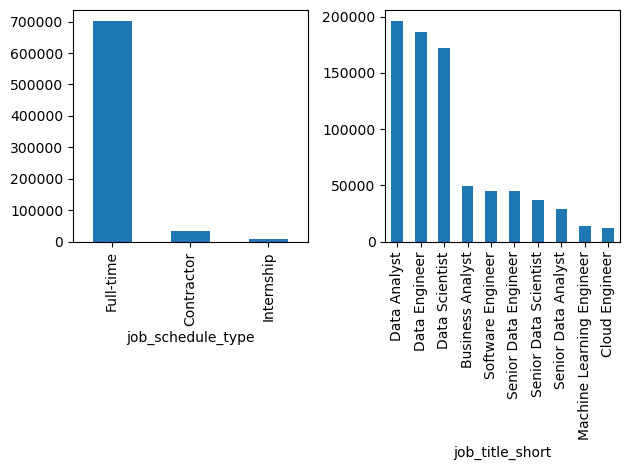

In [13]:
fig, ax = plt.subplots(1,2)

df['job_title_short'].value_counts().plot(kind='bar', ax=ax[1])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax=ax[0])
# plt.show()
fig.tight_layout()

**************************** EXAMPLE - CNT OF TOP SKILLS IN JOB POSTING ****************************

In [14]:
df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
skills_counts = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_counts = skills_counts.reset_index(name='skill_count')
df_skills_counts.sort_values(by='skill_count', ascending=False, inplace=True)
df_skills_counts

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
293,codecommit,Business Analyst,1
2233,xamarin,Machine Learning Engineer,1
1087,mlr,Machine Learning Engineer,1


In [15]:
job_titles = ['Data Scientist', 'Data Analyst', 'Data Engineer']

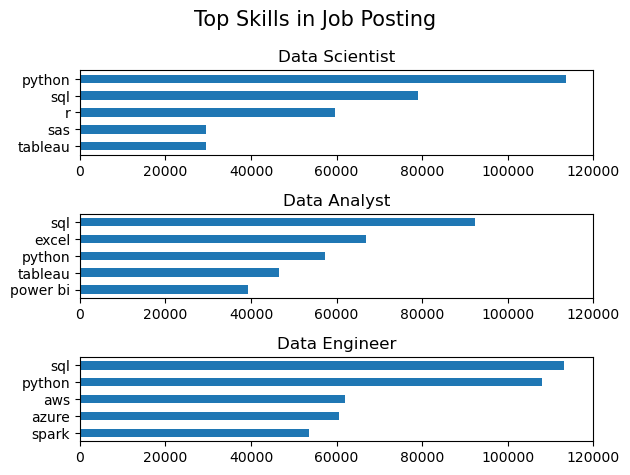

In [40]:
fig, ax = plt.subplots(3,1)

for i, title in enumerate(job_titles):
    # print(i, title)
    df_plot = df_skills_counts[df_skills_counts['job_title_short'] == title].head(5)
    df_plot.plot(kind='barh', x='job_skills' , y='skill_count', ax=ax[i], title=title, legend=False)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].set_xlim(0, 120000)

fig.suptitle('Top Skills in Job Posting', fontsize=15)
fig.tight_layout()